# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.rcParams['figure.figsize'] = (16, 16)
plt.rcParams['font.size'] = 14
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
def run_with_noise(scale = 0, x_train = x_train,x_test =x_test, y_train = y_train, y_test = y_test):

    batch_size = 128
    num_classes = 10
    epochs = 12
    
    x_train = x_train + np.random.normal(scale = scale, size = (60000,28,28,1))
    x_test = x_test + np.random.normal(scale = scale, size = (10000,28,28,1))
    plt.imshow(x_train[7])
    plt.show()
    plt.close()
    
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

    history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return [
        history, score
    ]
    

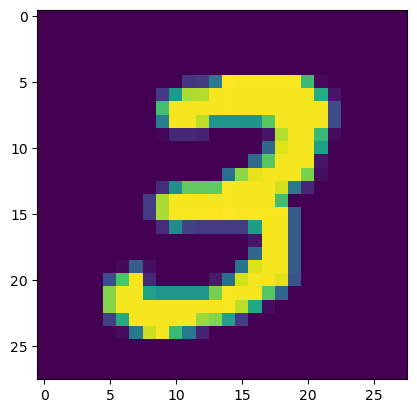

Epoch 1/12
469/469 [==============================] - 11s 14ms/step - loss: 2.2829 - accuracy: 0.1345 - val_loss: 2.2462 - val_accuracy: 0.2598
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2227 - accuracy: 0.2411 - val_loss: 2.1698 - val_accuracy: 0.5425
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.1411 - accuracy: 0.3599 - val_loss: 2.0643 - val_accuracy: 0.6612
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 2.0273 - accuracy: 0.4560 - val_loss: 1.9151 - val_accuracy: 0.7166
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 1.8741 - accuracy: 0.5274 - val_loss: 1.7171 - val_accuracy: 0.7482
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 1.6871 - accuracy: 0.5788 - val_loss: 1.4895 - val_accuracy: 0.7690
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 1.4933 - accuracy: 0.6147 - val_loss: 1.2680 - val_accuracy: 0.786

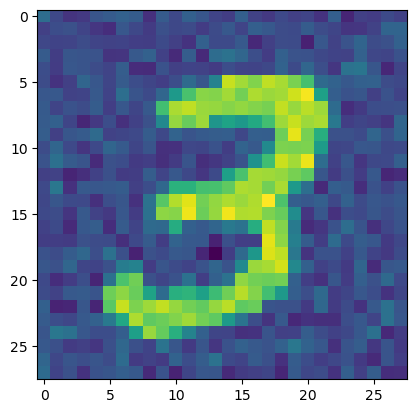

Epoch 1/12
469/469 [==============================] - 7s 13ms/step - loss: 2.2614 - accuracy: 0.1646 - val_loss: 2.2123 - val_accuracy: 0.3386
Epoch 2/12
469/469 [==============================] - 6s 14ms/step - loss: 2.1891 - accuracy: 0.2673 - val_loss: 2.1216 - val_accuracy: 0.5028
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.0974 - accuracy: 0.3612 - val_loss: 2.0054 - val_accuracy: 0.6230
Epoch 4/12
469/469 [==============================] - 6s 12ms/step - loss: 1.9818 - accuracy: 0.4370 - val_loss: 1.8558 - val_accuracy: 0.6953
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 1.8387 - accuracy: 0.5037 - val_loss: 1.6746 - val_accuracy: 0.7523
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 1.6758 - accuracy: 0.5573 - val_loss: 1.4735 - val_accuracy: 0.7894
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 1.5092 - accuracy: 0.5978 - val_loss: 1.2771 - val_accuracy: 0.8131

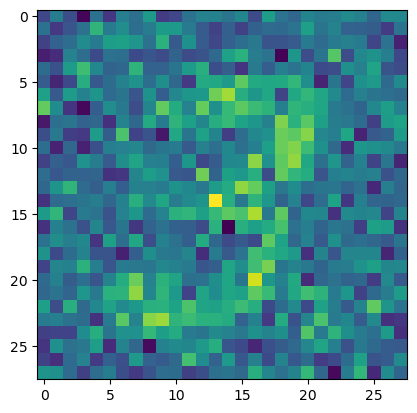

Epoch 1/12
469/469 [==============================] - 7s 13ms/step - loss: 2.3036 - accuracy: 0.1156 - val_loss: 2.2743 - val_accuracy: 0.2144
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2792 - accuracy: 0.1486 - val_loss: 2.2497 - val_accuracy: 0.3179
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2555 - accuracy: 0.1842 - val_loss: 2.2208 - val_accuracy: 0.3917
Epoch 4/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2300 - accuracy: 0.2142 - val_loss: 2.1856 - val_accuracy: 0.4576
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 2.1956 - accuracy: 0.2501 - val_loss: 2.1424 - val_accuracy: 0.5145
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 2.1560 - accuracy: 0.2863 - val_loss: 2.0910 - val_accuracy: 0.5579
Epoch 7/12
469/469 [==============================] - 6s 12ms/step - loss: 2.1098 - accuracy: 0.3229 - val_loss: 2.0315 - val_accuracy: 0.6052

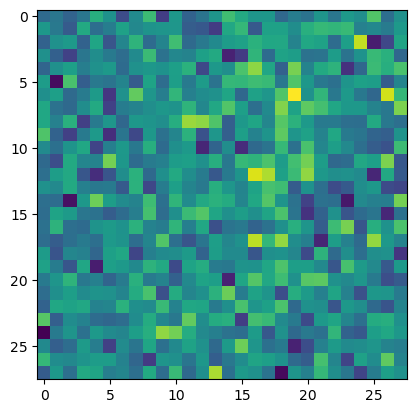

Epoch 1/12
469/469 [==============================] - 7s 13ms/step - loss: 2.3336 - accuracy: 0.1006 - val_loss: 2.2943 - val_accuracy: 0.1298
Epoch 2/12
469/469 [==============================] - 6s 12ms/step - loss: 2.3070 - accuracy: 0.1138 - val_loss: 2.2851 - val_accuracy: 0.1567
Epoch 3/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2948 - accuracy: 0.1261 - val_loss: 2.2769 - val_accuracy: 0.1899
Epoch 4/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2863 - accuracy: 0.1349 - val_loss: 2.2675 - val_accuracy: 0.2199
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2781 - accuracy: 0.1441 - val_loss: 2.2552 - val_accuracy: 0.2501
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2680 - accuracy: 0.1544 - val_loss: 2.2399 - val_accuracy: 0.2812
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2565 - accuracy: 0.1669 - val_loss: 2.2217 - val_accuracy: 0.3219

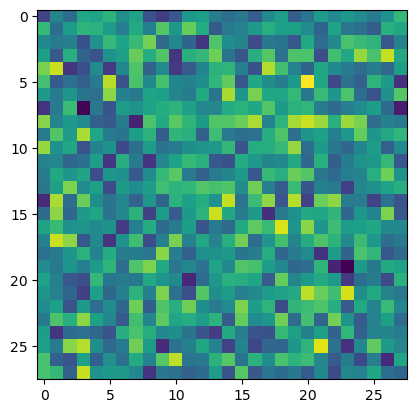

Epoch 1/12
469/469 [==============================] - 7s 13ms/step - loss: 2.4269 - accuracy: 0.1039 - val_loss: 2.2986 - val_accuracy: 0.1138
Epoch 2/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3359 - accuracy: 0.1099 - val_loss: 2.2920 - val_accuracy: 0.1256
Epoch 3/12
469/469 [==============================] - 6s 12ms/step - loss: 2.3136 - accuracy: 0.1142 - val_loss: 2.2912 - val_accuracy: 0.1344
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3040 - accuracy: 0.1186 - val_loss: 2.2911 - val_accuracy: 0.1451
Epoch 5/12
469/469 [==============================] - 6s 12ms/step - loss: 2.3009 - accuracy: 0.1200 - val_loss: 2.2905 - val_accuracy: 0.1507
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 2.2974 - accuracy: 0.1201 - val_loss: 2.2895 - val_accuracy: 0.1519
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 2.2948 - accuracy: 0.1248 - val_loss: 2.2869 - val_accuracy: 0.1587

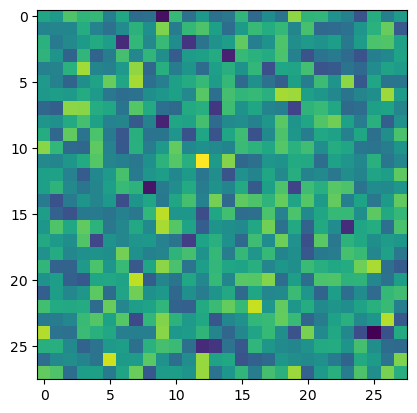

Epoch 1/12
469/469 [==============================] - 7s 13ms/step - loss: 2.7060 - accuracy: 0.1011 - val_loss: 2.3202 - val_accuracy: 0.1056
Epoch 2/12
469/469 [==============================] - 7s 14ms/step - loss: 2.3831 - accuracy: 0.1015 - val_loss: 2.3032 - val_accuracy: 0.1057
Epoch 3/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3287 - accuracy: 0.1000 - val_loss: 2.3024 - val_accuracy: 0.1031
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3133 - accuracy: 0.1052 - val_loss: 2.3022 - val_accuracy: 0.1028
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3091 - accuracy: 0.1025 - val_loss: 2.3023 - val_accuracy: 0.1071
Epoch 6/12
469/469 [==============================] - 6s 12ms/step - loss: 2.3068 - accuracy: 0.1037 - val_loss: 2.3023 - val_accuracy: 0.1121
Epoch 7/12
469/469 [==============================] - 6s 13ms/step - loss: 2.3054 - accuracy: 0.1045 - val_loss: 2.3023 - val_accuracy: 0.1128

In [8]:
historys = []
scores = []
scales = [0, 0.1, .5, 1.0, 2.0, 4.0]

for i in scales:
    history, score = run_with_noise(scale = i)
    historys.append(history)
    scores.append(score)

In [24]:
plt.rcParams['figure.figsize'] = (24, 12)
plt.rcParams['font.size'] = 14

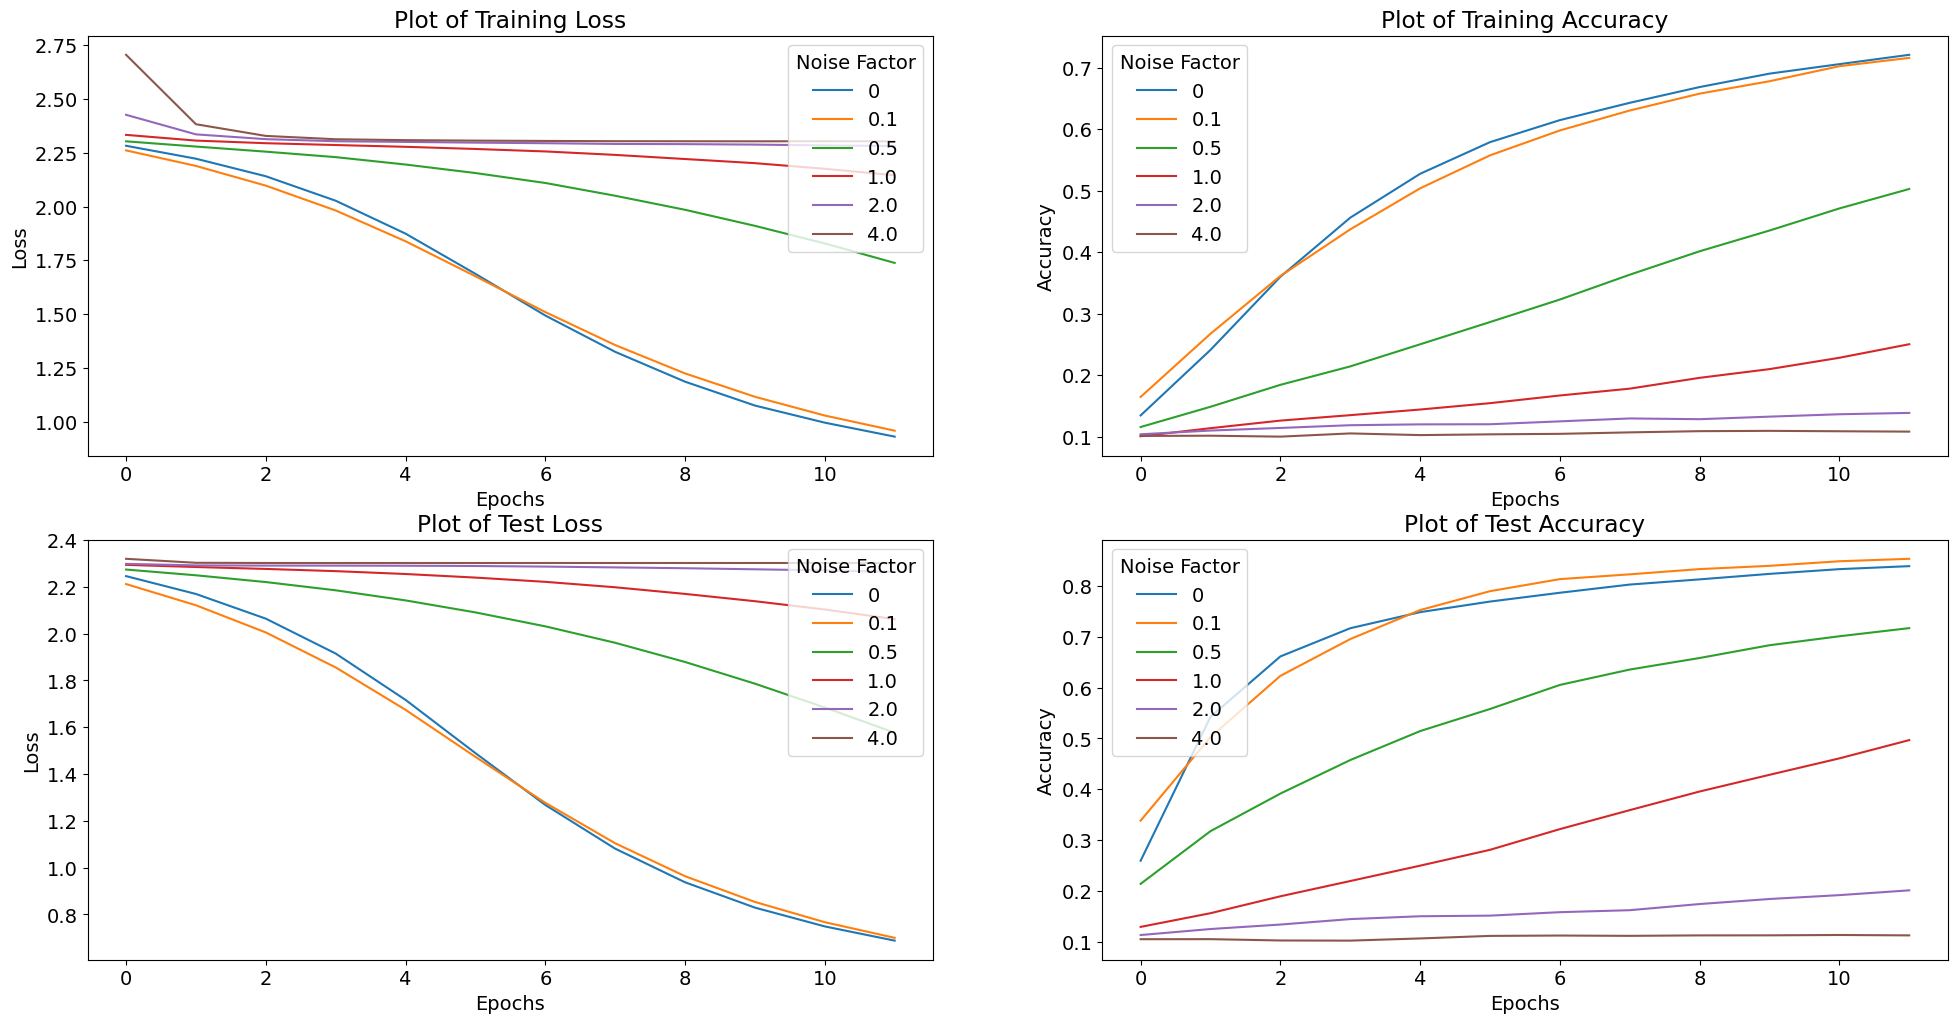

In [26]:
fig, ax = plt.subplots(2,2)
for i in range(len(scales)):
    ax[0,0].plot(historys[i].history['loss'], label = scales[i])
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss')
    ax[0,0].legend(loc = "upper right", title = "Noise Factor")
    ax[0,0].set_title("Plot of Training Loss")
    
    ax[1,0].plot(historys[i].history['val_loss'], label = scales[i])
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Loss')
    ax[1,0].legend(loc = "upper right", title = "Noise Factor")
    ax[1,0].set_title("Plot of Test Loss")
    
    ax[0,1].plot(historys[i].history['accuracy'], label = scales[i])
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Accuracy')
    ax[0,1].legend(loc = "upper left", title = "Noise Factor")
    ax[0,1].set_title("Plot of Training Accuracy")
    
    ax[1,1].plot(historys[i].history['val_accuracy'], label = scales[i])
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Accuracy')
    ax[1,1].legend(loc = "upper left", title = "Noise Factor")
    ax[1,1].set_title("Plot of Test Accuracy")

### The results from the CNN appear to be more consistent and reasonable than the results from the multilayer perceptron. As epochs increases it is normal for training loss and test loss to decrease, however the values from last week appeared to be more erratic. In addition, the training and test accuracy curves increase especially when the noise factor is non-existent or low which is what is expected. The multilayer perceptron showed the training accuracy consistently increasing, however the validation accuracy similar to the loss exhibited erratic behavior. Overall, the CNN for the MNIST dataset appeared to achieve more consistent results than the multilayer perceptron